<a href="https://colab.research.google.com/github/fadhilhamdi/Pembelajaran-Mesin_Muhammad-Fadhil-Hamdi_2211533018/blob/main/hierarkiclustering_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
def divisive_clustering(X, n_clusters):
    clusters = [X]
    while len(clusters) < n_clusters:
        # Find the largest cluster
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)

        # Split the largest cluster into two using k-means
        kmeans = KMeans(n_clusters=2, random_state=0).fit(largest_cluster)
        labels = kmeans.labels_

        # Append the two clusters to the list of clusters
        clusters.append(largest_cluster[labels == 0])
        clusters.append(largest_cluster[labels == 1])

    return clusters

In [ ]:
def plot_clusters(clusters):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for idx, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[idx % len(colors)])
    plt.title("Divisive Hierarchical Clustering")
    plt.xlabel('currentSmoker')
    plt.ylabel('age')
    plt.show()


In [ ]:
# Membaca dataset dari file CSV
file_path = 'framingham.csv'  # Ganti dengan path ke file dataset Anda
data = pd.read_csv(file_path)


In [ ]:
# Pastikan memilih kolom yang relevan untuk clustering
# Misalnya, jika dataset memiliki kolom 'feature1' dan 'feature2'
X = data[['currentSmoker', 'age']].values


In [ ]:
# Opsional: Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Menjalankan divisive clustering
n_clusters = 2  # Jumlah cluster yang diinginkan
clusters = divisive_clustering(X_scaled, n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


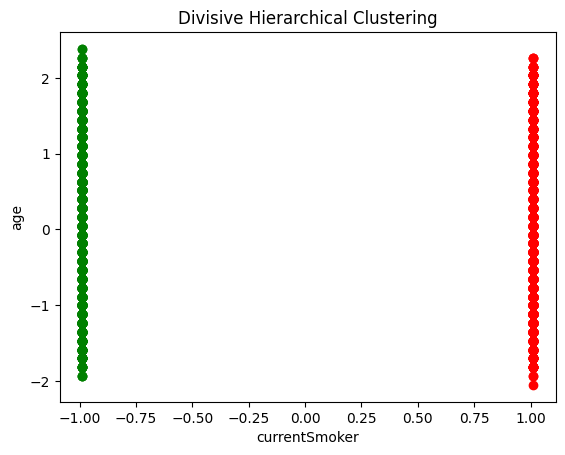

In [ ]:
# Plot hasil clustering
plot_clusters(clusters)